In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
dataset=r'C:\Users\Professor Moruf\Desktop\CSV FILES\Supermart Grocery Sales - Retail Analytics Dataset (1).csv'
dataset

'C:\\Users\\Professor Moruf\\Desktop\\CSV FILES\\Supermart Grocery Sales - Retail Analytics Dataset (1).csv'

In [2]:
df=pd.read_csv(dataset)
df

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu


**DESCRIPTIVE  STATISTICS

In [3]:
print(df.describe())


             Sales     Discount       Profit
count  9994.000000  9994.000000  9994.000000
mean   1496.596158     0.226817   374.937082
std     577.559036     0.074636   239.932881
min     500.000000     0.100000    25.250000
25%    1000.000000     0.160000   180.022500
50%    1498.000000     0.230000   320.780000
75%    1994.750000     0.290000   525.627500
max    2500.000000     0.350000  1120.950000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


**FREQUENCY TABLE

In [5]:
print(df['City'].value_counts())

City
Kanyakumari       459
Tirunelveli       446
Bodi              442
Krishnagiri       440
Vellore           435
Perambalur        434
Tenkasi           432
Chennai           432
Salem             431
Karur             430
Pudukottai        430
Coimbatore        428
Ramanadhapuram    421
Cumbum            417
Virudhunagar      416
Madurai           408
Ooty              404
Namakkal          403
Viluppuram        397
Dindigul          396
Theni             387
Dharmapuri        376
Nagercoil         373
Trichy            357
Name: count, dtype: int64


**GROUPBY ANALYSES

In [6]:
#Calculate the avaerage sales for each city
df.groupby('City')['Sales'].mean()

City
Bodi              1509.450226
Chennai           1469.821759
Coimbatore        1483.056075
Cumbum            1501.311751
Dharmapuri        1520.087766
Dindigul          1453.613636
Kanyakumari       1539.790850
Karur             1493.658140
Krishnagiri       1448.347727
Madurai           1514.303922
Nagercoil         1478.378016
Namakkal          1485.186104
Ooty              1483.396040
Perambalur        1520.133641
Pudukottai        1519.020930
Ramanadhapuram    1506.855107
Salem             1524.577726
Tenkasi           1489.935185
Theni             1497.552972
Tirunelveli       1479.399103
Trichy            1516.535014
Vellore           1555.287356
Viluppuram        1464.166247
Virudhunagar      1458.701923
Name: Sales, dtype: float64

In [7]:
#Calculate the total profit for each category
df.groupby('Category')['Profit'].sum()

Category
Bakery               528521.06
Beverages            525605.76
Eggs, Meat & Fish    567357.22
Food Grains          529162.64
Fruits & Veggies     530400.38
Oil & Masala         497895.29
Snacks               568178.85
Name: Profit, dtype: float64

*VISUALIZATION

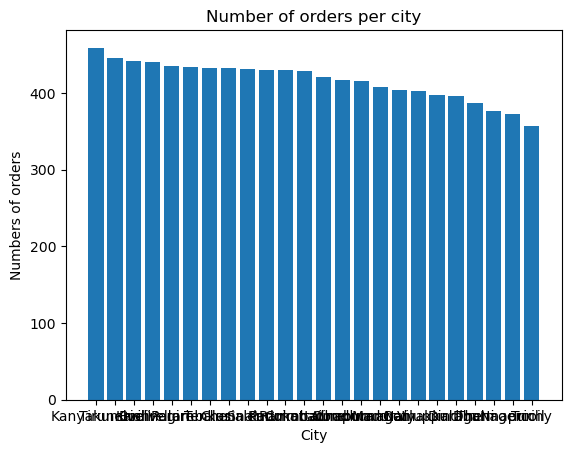

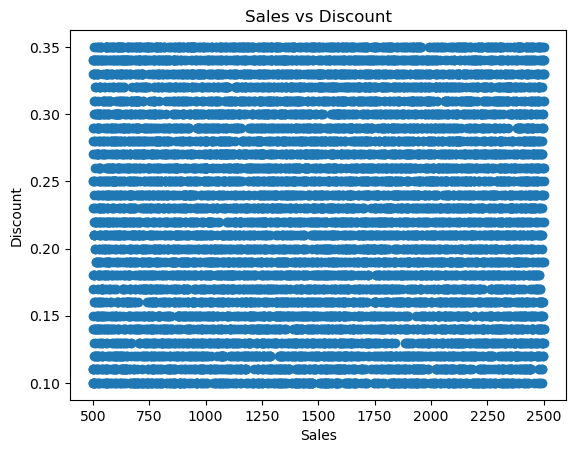

In [13]:
#create a barchart of the number of orders per city
plt.bar(df['City'].value_counts().index,df['City'].value_counts().values)
plt.xlabel('City')
plt.ylabel('Numbers of orders')
plt.title('Number of orders per city')
plt.show()


#Create a scatter plot of sales vs discount
plt.scatter(df['Sales'], df['Discount'])
plt.xlabel('Sales')
plt.ylabel('Discount')
plt.title('Sales vs Discount')
plt.show()

*MODELING 

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Split the data into training and testing sets
A=df.drop('Sales', axis=1)
X=A.drop('Order ID', axis=1)
y=df['Sales']
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)

#Train a linear regression  model
model = LinearRegression()
model.fit(X_train, y_train)

#Make predictions on the  test set
predictions = model.predict(X_test)

#Evaluate the moodels performance
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, predictions))

ValueError: could not convert string to float: 'Amy'

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#Split the data into training and testing sets
X=df.drop('Customer Name', axis=1)
y=df['Customer Name']
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)

#Train a linear regression  model
model = RandomForestClassifier()
model.fit(X_train, y_train)

#Make predictions on the  test set
predictions = model.predict(X_test)

#Evaluate the moodels performance
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

ValueError: could not convert string to float: 'OD6175'